<center><img src="https://semcomp-epcc-unsa.github.io/assets/images/cslogos/logo-only.png" width="120">


$\tiny{Universidad \ Nacional \ de \ San \ Agustín \ de \ Arequipa \\
Escuela \ Profesional \ de \ Ciencia \ de \ la \ Computación  }$

---


#<center>$Laboratorio \ 06$

**Curso:** *Computacón Gráfica*

**Tema:** *DDA y Bresenham*

**Profesora:** *Paccotacya Yanque, Rosa Yuliana Gabriela*

**Alumno:** *Nifla Llallacachi, Manuel Angel* \\

---
#*RESUMEN*

El trabajo se realizó en VisualStudio, utilizando la libreria GLUT el cual tiene incorporado OpenGl.



---
#*Requerimientos*


In [ ]:
!apt-get update
!apt-get install -y freeglut3-dev binutils-gold g++ cmake libglew-dev mesa-common-dev build-essential libgl1-mesa-dev libglu1-mesa-dev libpng-dev


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

---
#*CODIGO C++ DE LAS FUNCIONES*

In [ ]:
%%writefile main.cpp
#include <GL/glut.h>
#include <iostream>
#include <cmath>

struct Casa {
    int x; // Origen en x
    int y; // Origen en y
    int altura; // Altura de la casa
    int ancho; // Ancho de la casa
};

struct Carro {
    int x; // Origen en x
    int y; // Origen en y
    int altura; // Altura del carro
    int ancho; // Ancho del carro
};

void init() {
    glClearColor(1.0, 1.0, 1.0, 1.0); // Fondo blanco
    glColor3f(0.0, 0.0, 0.0); // Color de la línea: negro
    glMatrixMode(GL_PROJECTION);
    gluOrtho2D(0, 800, 0, 600); // Definir el área de dibujo
}

void setPixel(int x, int y) {
    glBegin(GL_POINTS);
    glVertex2i(x, y);
    glEnd();
}

void DDA(int x1, int y1, int x2, int y2) {
    int dx = x2 - x1;
    int dy = y2 - y1;
    int steps = abs(dx) > abs(dy) ? abs(dx) : abs(dy);
    float xIncrement = dx / (float)steps;
    float yIncrement = dy / (float)steps;

    float x = x1;
    float y = y1;
    for (int i = 0; i <= steps; i++) {
        setPixel(round(x), round(y));
        x += xIncrement;
        y += yIncrement;
    }
}

void Bresenham(int x1, int y1, int x2, int y2) {
    int dx = abs(x2 - x1);
    int dy = abs(y2 - y1);
    int p = 2 * dy - dx;
    int twody = 2 * dy;
    int twodydx = 2 * (dy - dx);
    int x, y, xEnd;

    if (x1 > x2) {
        x = x2;
        y = y2;
        xEnd = x1;
    }
    else {
        x = x1;
        y = y1;
        xEnd = x2;
    }

    setPixel(x, y);

    while (x < xEnd) {
        x++;
        if (p < 0) {
            p += twody;
        }
        else {
            y++;
            p += twodydx;
        }
        setPixel(x, y);
    }
}

void DottedLine(int x1, int y1, int x2, int y2) {
    glColor3f(1.0, 0.0, 0.0); // Color rojo para línea punteada
    glEnable(GL_LINE_STIPPLE);
    glLineStipple(1, 0x00FF); // Patrón para línea punteada

    glBegin(GL_LINES);
    glVertex2i(x1, y1);
    glVertex2i(x2, y2);
    glEnd();

    glDisable(GL_LINE_STIPPLE);
}

void DashedLine(int x1, int y1, int x2, int y2) {
    glColor3f(0.0, 0.0, 1.0); // Color azul para línea discontinua
    glEnable(GL_LINE_STIPPLE);
    glLineStipple(1, 0x0F0F); // Patrón para línea discontinua

    glBegin(GL_LINES);
    glVertex2i(x1, y1);
    glVertex2i(x2, y2);
    glEnd();

    glDisable(GL_LINE_STIPPLE);
}

void SolidLine(int x1, int y1, int x2, int y2) {
    glColor3f(0.0, 0.0, 0.0); // Color negro para línea sólida

    glBegin(GL_LINES);
    glVertex2i(x1, y1);
    glVertex2i(x2, y2);
    glEnd();
}

void crearCasa(Casa& C) {
    // Fachada de la casa (rectángulo)
    glColor3f(1.0, 0.0, 0.0); // Rojo
    glBegin(GL_QUADS);
    glVertex2i(C.x, C.y);
    glVertex2i(C.x + C.ancho, C.y);
    glVertex2i(C.x + C.ancho, C.y + C.altura);
    glVertex2i(C.x, C.y + C.altura);
    glEnd();

    // Techo de la casa (triángulo)
    glColor3f(0.0, 0.0, 1.0); // Azul
    glBegin(GL_TRIANGLES);
    glVertex2i(C.x, C.y + C.altura);
    glVertex2i(C.x + C.ancho / 2, C.y + C.altura * 2);
    glVertex2i(C.x + C.ancho, C.y + C.altura);
    glEnd();

    // Puerta de la casa (rectángulo)
    glColor3f(0.0, 1.0, 0.0); // Verde
    glBegin(GL_QUADS);
    glVertex2i(C.x + C.ancho / 4, C.y);
    glVertex2i(C.x + 3 * C.ancho / 4, C.y);
    glVertex2i(C.x + 3 * C.ancho / 4, C.y + C.altura / 2);
    glVertex2i(C.x + C.ancho / 4, C.y + C.altura / 2);
    glEnd();

    // Ventanas de la casa (cuadrados)
    glColor3f(1.0, 1.0, 0.0); // Amarillo
    glBegin(GL_QUADS);
    glVertex2i(C.x + C.ancho / 6, C.y + C.altura / 2);
    glVertex2i(C.x + C.ancho / 3, C.y + C.altura / 2);
    glVertex2i(C.x + C.ancho / 3, C.y + 2 * C.altura / 3);
    glVertex2i(C.x + C.ancho / 6, C.y + 2 * C.altura / 3);
    glEnd();

    glBegin(GL_QUADS);
    glVertex2i(C.x + 2 * C.ancho / 3, C.y + C.altura / 2);
    glVertex2i(C.x + 5 * C.ancho / 6, C.y + C.altura / 2);
    glVertex2i(C.x + 5 * C.ancho / 6, C.y + 2 * C.altura / 3);
    glVertex2i(C.x + 2 * C.ancho / 3, C.y + 2 * C.altura / 3);
    glEnd();
}

void dibujarCasa() {
    Casa C;
    C.x = 100;
    C.y = 100;
    C.altura = 150;
    C.ancho = 200;
    crearCasa(C);
}

void crearCarro(Carro& V) {
    // Cuerpo del carro (rectángulo)
    glColor3f(0.0, 1.0, 1.0); // Cian
    glBegin(GL_QUADS);
    glVertex2i(V.x, V.y);
    glVertex2i(V.x + V.ancho, V.y);
    glVertex2i(V.x + V.ancho, V.y + V.altura / 2);
    glVertex2i(V.x, V.y + V.altura / 2);
    glEnd();

    // Ventanas del carro (cuadrados)
    glColor3f(1.0, 0.0, 1.0); // Magenta
    glBegin(GL_QUADS);
    glVertex2i(V.x + V.ancho / 6, V.y + V.altura / 4);
    glVertex2i(V.x + 2 * V.ancho / 6, V.y + V.altura / 4);
    glVertex2i(V.x + 2 * V.ancho / 6, V.y + 3 * V.altura / 4);
    glVertex2i(V.x + V.ancho / 6, V.y + 3 * V.altura / 4);
    glEnd();

    glBegin(GL_QUADS);
    glVertex2i(V.x + 4 * V.ancho / 6, V.y + V.altura / 4);
    glVertex2i(V.x + 5 * V.ancho / 6, V.y + V.altura / 4);
    glVertex2i(V.x + 5 * V.ancho / 6, V.y + 3 * V.altura / 4);
    glVertex2i(V.x + 4 * V.ancho / 6, V.y + 3 * V.altura / 4);
    glEnd();

    // Llantas del carro (círculos)
    glColor3f(0.0, 0.0, 0.0); // Negro
    glBegin(GL_POLYGON);
    for (int i = 0; i < 360; i++) {
        float theta = i * 3.14159 / 180;
        glVertex2f(V.x + V.ancho / 5 + cos(theta) * V.ancho / 10, V.y + V.altura / 4 + sin(theta) * V.altura / 4);
    }
    glEnd();

    glBegin(GL_POLYGON);
    for (int i = 0; i < 360; i++) {
        float theta = i * 3.14159 / 180;
        glVertex2f(V.x + 4 * V.ancho / 5 + cos(theta) * V.ancho / 10, V.y + V.altura / 4 + sin(theta) * V.altura / 4);
    }
    glEnd();
}

void dibujarCarro() {
    Carro V;
    V.x = 400;
    V.y = 100;
    V.altura = 50;
    V.ancho = 100;
    crearCarro(V);
}

void display() {
    glClear(GL_COLOR_BUFFER_BIT);

    // Dibujar casa y carro
    dibujarCasa();
    dibujarCarro();

    // Dibujar líneas con diferentes estilos
    glLineWidth(2.0); // Ancho de línea

    // Línea sólida
    SolidLine(50, 50, 200, 50);

    // Línea punteada
    DottedLine(50, 100, 200, 100);

    // Línea discontinua
    DashedLine(50, 150, 200, 150);

    // Línea con algoritmo DDA
    DDA(50, 200, 200, 200);

    // Línea con algoritmo Bresenham
    Bresenham(50, 250, 200, 250);

    glFlush();
}

int main(int argc, char** argv) {
    glutInit(&argc, argv);
    glutInitDisplayMode(GLUT_SINGLE | GLUT_RGB);
    glutInitWindowSize(800, 600);
    glutInitWindowPosition(100, 100);
    glutCreateWindow("Casa y Carro");
    init();
    glutDisplayFunc(display);
    glutMainLoop();
    return 0;
}


Overwriting main.cpp


---
#*IMAGEN DE SALIDA*

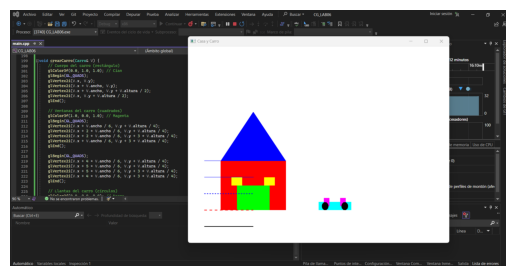

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Suponiendo que el nombre del archivo cargado es 'imagen.jpg'
img = Image.open('Img.png')
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()
